In [8]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from estimation_fct import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Load model
from model import ModelClass

model = ModelClass() 

par = model.par
sol = model.sol
sim = model.sim

model.solve()
model.simulate()

In [10]:
# Prepare data
mean, weights, moments = prepare_data(par)

In [32]:
# Prepare SMM
theta_names = ("beta", "sigma", "gamma", "mu", "r_s", "r_a")
theta_init = np.array([0.98425082, 1.14462434, 2.64054034, 9.51334575, 0.00991883,
       0.05076255])

# Original bounds
orig_bounds = [(0.0, 1.0),   # beta
               (0.1, 6.0),   # sigma
               (0.1, 10.0),  # gamma
               (0.0, 10.0),  # mu
               (0.0, 0.1),  # r_s
               (0.0, 0.1)]   # r_a

theta_init_scaled = scale_params(theta_init, orig_bounds)

In [33]:
# Do SMM
objective = lambda theta: obj_func(theta, theta_names, mean, weights, model, orig_bounds, do_print=True)

res = minimize(
    objective, 
    theta_init_scaled,
    method='nelder-mead',
    bounds=[(0,1)] * len(theta_init_scaled),
    tol=1e-6,
    options={"maxiter":10000}
)


beta=0.984 sigma=1.145 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.051 
Error = 57.844906, Time = 3.3691 seconds
beta=0.967 sigma=1.145 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.051 
Error = 7.481477, Time = 5.6446 seconds
beta=0.984 sigma=1.197 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.051 
Error = 16.353186, Time = 5.8831 seconds
beta=0.984 sigma=1.145 gamma=2.768 mu=9.513 r_s=0.010 r_a=0.051 
Error = 63.711592, Time = 5.9508 seconds
beta=0.984 sigma=1.145 gamma=2.641 mu=9.989 r_s=0.010 r_a=0.051 
Error = nan, Time = 6.0883 seconds
beta=0.984 sigma=1.145 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.051 
Error = nan, Time = 6.1536 seconds
beta=0.984 sigma=1.145 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.053 
Error = nan, Time = 6.0631 seconds
beta=0.978 sigma=1.162 gamma=2.683 mu=9.672 r_s=0.010 r_a=0.048 
Error = 11.558553, Time = 6.2154 seconds
beta=0.983 sigma=1.149 gamma=2.651 mu=9.553 r_s=0.010 r_a=0.052 
Error = 47.659797, Time = 5.6949 seconds
beta=0.975 sigma=1.171 gamma=2.641 mu=9.513 r_s=0.010 r_a=0.051 


Traceback (most recent call last):
  File "c:\Users\peter\anaconda3\Lib\site-packages\numba\core\serialize.py", line 30, in _numba_unpickle
    def _numba_unpickle(address, bytedata, hashed):
    
KeyboardInterrupt

The above exception was the direct cause of the following exception:

SystemError: <function _numba_unpickle at 0x000001CEDF323E20> returned a result with an exception set

The above exception was the direct cause of the following exception:

SystemError: <function _numba_unpickle at 0x000001CEDF323E20> returned a result with an exception set

The above exception was the direct cause of the following exception:

SystemError: <function _numba_unpickle at 0x000001CEDF323E20> returned a result with an exception set

The above exception was the direct cause of the following exception:

SystemError: <function _numba_unpickle at 0x000001CEDF323E20> returned a result with an exception set

The above exception was the direct cause of the following exception:

Traceback (most recent

SystemError: CPUDispatcher(<function main_solver_loop at 0x000001CEE313C680>) returned a result with an exception set

In [44]:
# Load the model with calibrated values
theta_names = ("beta", "sigma", "gamma", "mu", "r_s", "r_a")
# theta_final = unscale_params(res.x, orig_bounds)
# theta_final = np.array([0.961, 1.127, 2.645, 6.657, 0.009, 0.041])
theta_final = np.array([0.982, 1.060, 3.877, 7.814, 0.02, 0.009])

for i, name in enumerate(theta_names):
    setattr(model.par, name, theta_final[i])

model.solve()
model.simulate()

In [45]:
theta_final

array([0.982, 1.06 , 3.877, 7.814, 0.02 , 0.009])

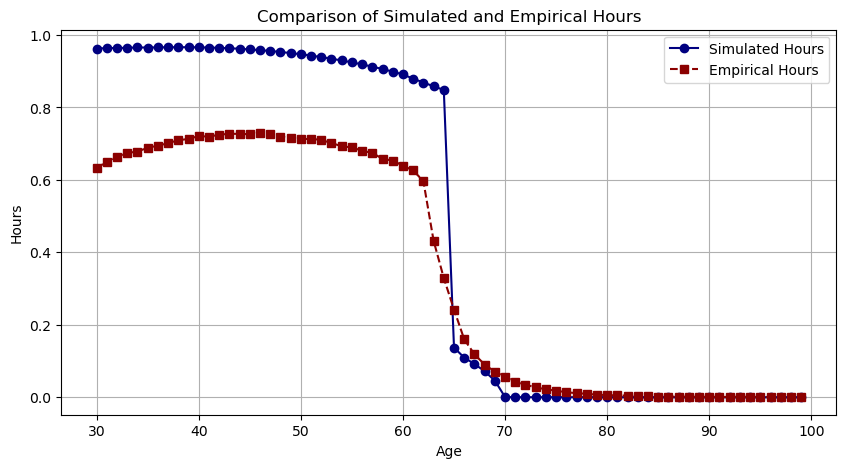

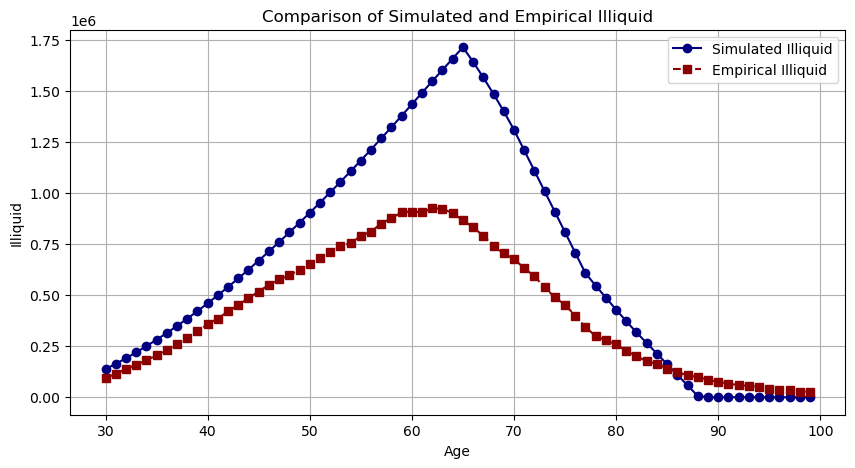

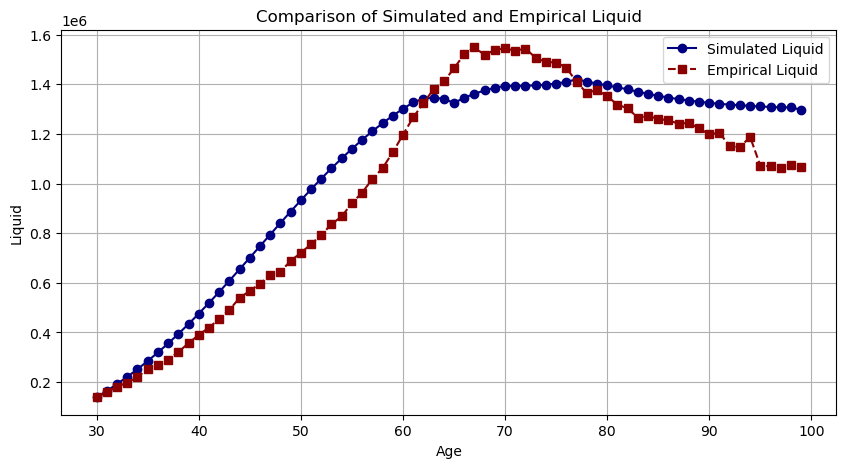

In [46]:
# plot the graph with calibrated values 
a_dict = {
    'hours': [np.mean(model.sim.h, axis=0), moments['hours']],
    'illiquid': [np.clip(np.mean(model.sim.s, axis=0), 0, None), moments['savings']],
    'liquid': [np.mean(model.sim.a, axis=0), moments['assets']]
}

# Define colors
simulated_color = "navy"  # Dark blue
empirical_color = "darkred"  # Dark red
ci_color = "lightcoral"  # Light red for confidence bands

for key, (simulated, empirical) in a_dict.items():
    plt.figure(figsize=(10, 5))
    
    x_vals = np.arange(len(empirical)) + par.start_age
    
    plt.plot(x_vals, simulated, label=f"Simulated {key.capitalize()}", marker="o", color=simulated_color)
    plt.plot(x_vals, empirical, label=f"Empirical {key.capitalize()}", linestyle="--", marker="s", color=empirical_color)

    # # 99.9% confidence interval
    # ci = std_dev
    # plt.fill_between(x_vals, empirical - ci, empirical + ci, color=ci_color, alpha=0.4, label="Empirical Standard Deviation")

    plt.xlabel("Age")
    plt.ylabel(key.capitalize())
    plt.title(f"Comparison of Simulated and Empirical {key.capitalize()}")
    plt.legend()
    plt.grid(True)
    plt.show()


Old best variables:

In [ ]:
theta_old = ([0.982, 1.060, 3.877, 7.814, 0.02, 0.009])